# Supervised Learning with Autoencoders

There are two ways in which Autoencoders can be used in this project:
1. To reduce the dimentionality of the data so it can be plotted and the distribution of the data can be visualised
2. To detect anomalous or fraudulent transactions


In [1]:
import tensorflow as tf
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# Get the labels
y = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/experimental_dataset_labels.csv', index_col=False)
# Get the scaled data (including both fraud and legit transactions)
X = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/scaled_experimental_dataset.csv', index_col=False)
# Get all the transactions (pre-scaled) before the lables had been removed so you can separate the fraud and legit transactions
all_tx = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/experimental_dataset.csv', index_col=False)

In [4]:
# Split the dataset into legit and fraud transactions (They will be used separately to train and test the autoencoder)
legit_tx = all_tx[all_tx['out_and_tx_malicious']==0]
#fraud_tx = all_tx[all_tx['out_and_tx_malicious']==1]

In [5]:
# separate the lables
legit_labels = legit_tx['out_and_tx_malicious']
fraud_tx_labels = fraud_tx['out_and_tx_malicious']
# remove irrelavent columns
legit_tx = legit_tx.drop(['in_malicious', 'out_malicious', 'is_malicious', 'all_malicious', 'out_and_tx_malicious'], axis=1)
#fraud_tx = fraud_tx.drop(['in_malicious', 'out_malicious', 'is_malicious', 'all_malicious', 'out_and_tx_malicious'], axis=1)

In [8]:
scaler = MinMaxScaler()

scaled_legit_tx = legit_tx.copy()
scaled_legit_tx = pd.DataFrame(scaler.fit_transform(legit_tx), columns = legit_tx.columns)

#scaled_fraud_tx = fraud_tx.copy()
#scaled_fraud_tx = pd.DataFrame(scaler.fit_transform(fraud_tx), columns = fraud_tx.columns)

In [9]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# Split into training, validation and test data
# Stratify to get even distribution of classes in the training and test data
# This is useful because we have an uneven class proprtion (far fewer fraudulent transactions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42, stratify=y)

# Create validation set as 15% of orginal dataset (not 10% of X_train which would be 10% of 80%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), stratify=y_test)

In [10]:
# Split into training, validation and test data
# Stratify to get even distribution of classes in the training and test data
# This is useful because we have an uneven class proprtion (far fewer fraudulent transactions)
legit_tx_train, legit_tx_test, legit_tx_label_train, legit_tx_label_test = train_test_split(scaled_legit_tx, legit_labels, test_size=1 - train_ratio, random_state=42)

# Create validation set as 15% of orginal dataset (not 10% of X_train which would be 10% of 80%)
legit_tx_val, legit_tx_test, legit_tx_label_val, legit_tx_label_test = train_test_split(legit_tx_test, legit_tx_label_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [11]:
# Split into training, validation and test data
# Stratify to get even distribution of classes in the training and test data
# This is useful because we have an uneven class proprtion (far fewer fraudulent transactions)
#fraud_tx_train, fraud_tx_test, fraud_tx_label_train, fraud_tx_label_test = train_test_split(scaled_fraud_tx, fraud_tx_labels, test_size=1 - train_ratio, random_state=42)

# Create validation set as 15% of orginal dataset (not 10% of X_train which would be 10% of 80%)
#fraud_tx_val, fraud_tx_test, fraud_tx_label_val, fraud_tx_label_test = train_test_split(fraud_tx_test, fraud_tx_label_test, test_size=test_ratio/(test_ratio + validation_ratio))

# Reduce to 3D and 2D to visualise distribution


## Reduce to 3D

In [ ]:
input_dim = 11
latent_dim = 3

encoder = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(11, )),
    keras.layers.Dense(140,activation='selu'),
    keras.layers.Dense(80,activation='selu'),
    keras.layers.Dense(16,activation='selu'),
    keras.layers.Dense(8,activation='selu'),
    keras.layers.Dense(latent_dim)
])

decoder = keras.models.Sequential([
  keras.layers.Dense(8, input_shape=(latent_dim, )),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(input_dim)
])

Autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
Autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 43279     
                                                                 
 sequential_1 (Sequential)   (None, 11)                43287     
                                                                 
Total params: 86566 (338.15 KB)
Trainable params: 86566 (338.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Autoencoder.compile(loss='mse',
                    optimizer=keras.optimizers.SGD())

give decoder larger values
dbscan clustering algorithm

In [ ]:
# fit using encoder only
y_pred_new_dim = encoder.predict(X_test)

36/36 [==============================] - 0s 2ms/step


## Visualise 3D scatter

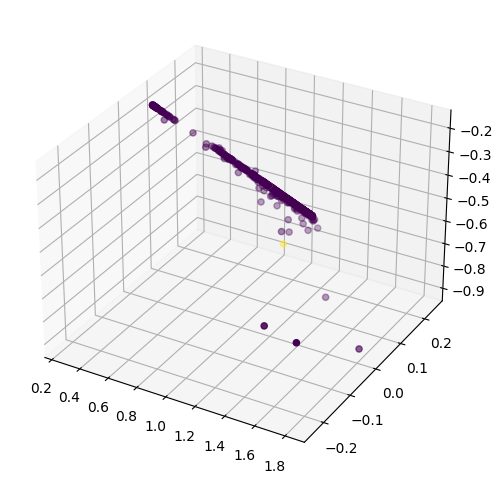

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

encoded_df = pd.DataFrame(y_pred_new_dim, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
encoded_df_scaled = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(encoded_df['Dimension 1'], encoded_df['Dimension 2'], encoded_df['Dimension 3'], c=y_test, cmap='viridis')

plt.show()

## Reduce to 2D

In [ ]:
input_dim = 11
latent_dim = 2

encoder_v2 = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(11, )),
    keras.layers.Dense(140,activation='selu'),
    keras.layers.Dense(80,activation='selu'),
    keras.layers.Dense(16,activation='selu'),
    keras.layers.Dense(8,activation='selu'),
    keras.layers.Dense(latent_dim)
])

decoder_v2 = keras.models.Sequential([
  keras.layers.Dense(8, input_shape=(latent_dim, )),
    keras.layers.Dense(16,activation='selu'),
    keras.layers.Dense(80,activation='selu'),
    keras.layers.Dense(140,activation='selu'),
    keras.layers.Dense(200,activation='selu'),
    keras.layers.Dense(input_dim)
])

Autoencoder_v2 = keras.models.Sequential([encoder_v2, decoder_v2])

In [ ]:
Autoencoder_v2.compile(loss='mse',
                    optimizer=keras.optimizers.SGD())
Autoencoder_v2.fit(X_train, X_train, validation_data=[X_val, X_val], epochs=50)

Epoch 1/50
284/284 [==============================] - 2s 5ms/step - loss: 0.0034 - val_loss: 5.6630e-04
Epoch 2/50
284/284 [==============================] - 1s 5ms/step - loss: 6.8890e-04 - val_loss: 4.3045e-04
Epoch 3/50
284/284 [==============================] - 1s 4ms/step - loss: 5.8091e-04 - val_loss: 3.3999e-04
Epoch 4/50
284/284 [==============================] - 1s 5ms/step - loss: 5.2900e-04 - val_loss: 3.1245e-04
Epoch 5/50
284/284 [==============================] - 1s 5ms/step - loss: 4.9807e-04 - val_loss: 2.9084e-04
Epoch 6/50
284/284 [==============================] - 1s 4ms/step - loss: 4.7371e-04 - val_loss: 2.7853e-04
Epoch 7/50
284/284 [==============================] - 1s 3ms/step - loss: 4.5746e-04 - val_loss: 2.6904e-04
Epoch 8/50
284/284 [==============================] - 2s 6ms/step - loss: 4.4338e-04 - val_loss: 2.5585e-04
Epoch 9/50
284/284 [==============================] - 2s 9ms/step - loss: 4.3027e-04 - val_loss: 2.5568e-04
Epoch 10/50
284/284 [===========

In [ ]:
# fit using encoder only
y_pred_2d = encoder_v2.predict(X_test)

36/36 [==============================] - 0s 2ms/step


## Visualise 2D scatter

In [ ]:
x_coord = [point[0] for point in y_pred_2d]
y_coord = [point[1] for point in y_pred_2d]

In [ ]:
y_test.value_counts()

out_and_tx_malicious
0                       1122
1                         11
dtype: int64

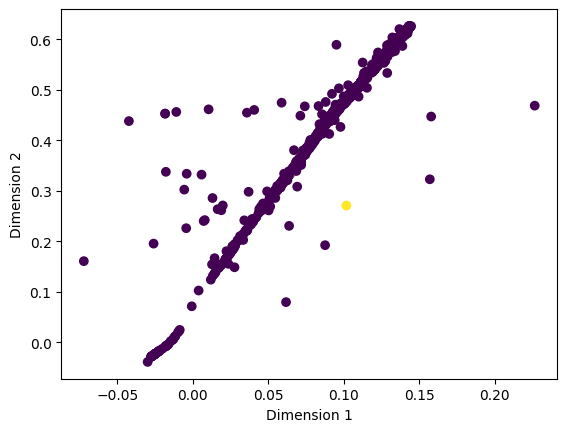

In [ ]:
plt.scatter(x_coord, y_coord, c=y_test['out_and_tx_malicious'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Autoencoder for detecting fraudulent transactions

In [62]:
input_dim = 11
latent_dim = 4
output_dim = input_dim

anomaly_encoder = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=(input_dim, )),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(latent_dim)
])

anomaly_decoder = keras.models.Sequential([
  keras.layers.Dense(latent_dim),
  keras.layers.Dense(8,activation='relu'),
  keras.layers.Dense(16,activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(32,activation='relu'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(output_dim)
])

anomaly_autoencoder = keras.models.Sequential([anomaly_encoder, anomaly_decoder])
anomaly_autoencoder.compile(loss='mse',
                    optimizer=keras.optimizers.SGD(learning_rate=0.01))

history = anomaly_autoencoder.fit(legit_tx_train, legit_tx_train,
                                  validation_data=[legit_tx_val, legit_tx_val], epochs=50)

Epoch 1/50
281/281 [==============================] - 5s 8ms/step - loss: 0.0338 - val_loss: 0.0179
Epoch 2/50
281/281 [==============================] - 2s 7ms/step - loss: 0.0111 - val_loss: 0.0070
Epoch 3/50
281/281 [==============================] - 2s 6ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 4/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 5/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 7/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 8/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/50
281/281 [==============================] - 1s 5ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/50
281/281 [==============================] - 2s 6ms/step - loss: 0.0034 - val_loss: 0.0036

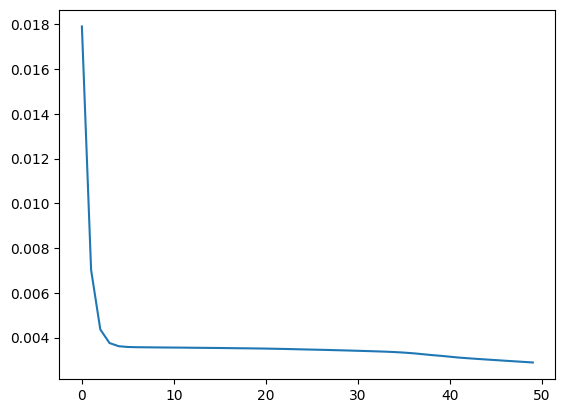

In [63]:
training_loss = history.history['val_loss']
plt.plot(training_loss)

In [64]:
legit_tx_test.shape

(1122, 11)

36/36 [==============================] - 0s 3ms/step


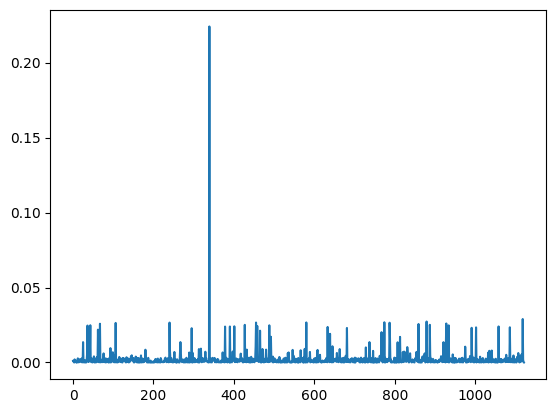

In [65]:
legit_tx_reconstructed_pred = anomaly_autoencoder.predict(legit_tx_test)
legit_reconstruction_loss = keras.losses.mse(legit_tx_reconstructed_pred, legit_tx_test)
plt.plot(legit_reconstruction_loss)

This shows the reconstruction loss for each data point in the legitimate transaction set

36/36 [==============================] - 0s 3ms/step


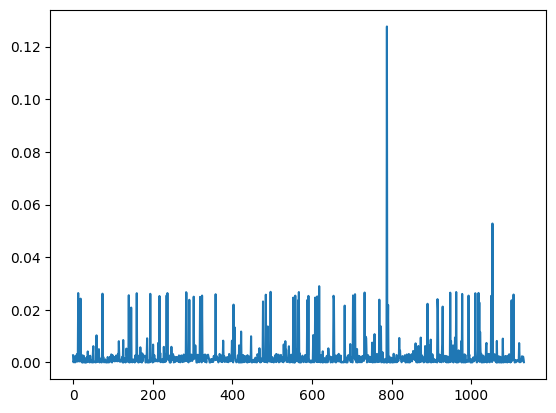

In [66]:
mixed_tx_reconstructed_pred = anomaly_autoencoder.predict(X_test)
mixed_reconstruction_loss = keras.losses.mse(mixed_tx_reconstructed_pred, X_test)
plt.plot(mixed_reconstruction_loss)

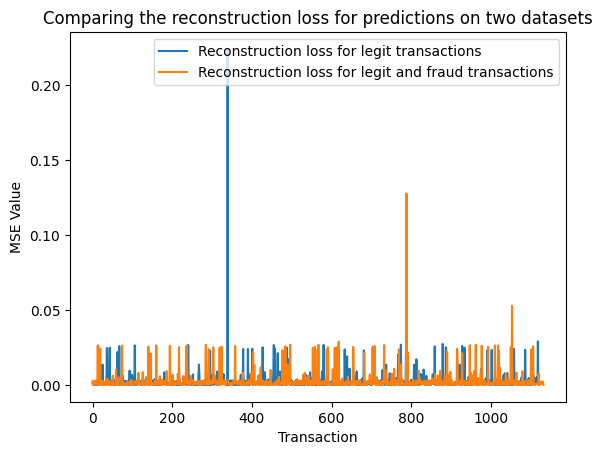

In [67]:
plt.plot(legit_reconstruction_loss, label='Reconstruction loss for legit transactions')
plt.plot(mixed_reconstruction_loss, label='Reconstruction loss for legit and fraud transactions')

plt.xlabel('Transaction')
plt.ylabel('MSE Value')
plt.legend()
plt.title('Comparing the reconstruction loss for predictions on two datasets')
plt.show()

By the looks of things, the autoencoder may not have learned from the legitimate transactions.

What I can do, is because this autoencoder is only trained on legitimate transactions, I can use more data. Originally, I picked only around 11,000 samples of legitimate transactions to try and overcome the imbalance problem. But since we're not training a binary classifier, we can utilise the full dataset (or at least a lot more than 11,000).

In [ ]:
# Load the full dataset
full_dataset = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/DG_out.csv', index_col=False)
all_legit_tx = full_dataset[full_dataset['out_and_tx_malicious']==0]

Once ive got the reconstruction loss - use another function to determine the thresholds

Then use another anomlay detection algorithm with the same metrrics to compare